#Pokemon Dataset Analysis:
**Problem:** Is it possible to create a classfier to identify legendary pokemon?

In [12]:
#import libraries and load dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [13]:
#Check the shape of the data
data.shape

(801, 41)

In [14]:
#Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


The heatmap and sum show that there are many null values in the type2, percentage_male, height_m, and weight_kg categories.

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


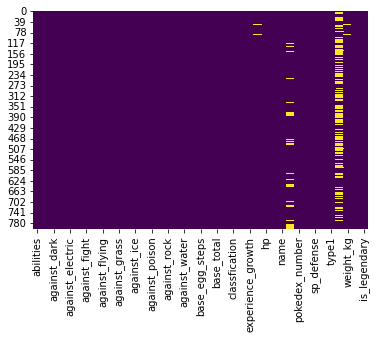

In [15]:
#Find missing vlues
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

The percentage_male category can be replaced with the mean of the category for better results.

Since only some pokemon have a type2 ability, we cannot replace those values with a random value either.

height_m and weight_kg can be replaced with the average of their columns since there are a small amount of null values in those categories.

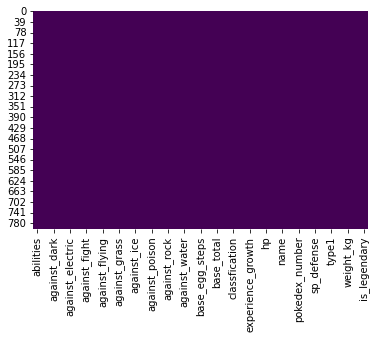

In [16]:
data['type2'].fillna('None', inplace=True)
data['height_m'].fillna(data['height_m'].mean(), inplace=True)
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace=True)
data['percentage_male'].fillna(data['percentage_male'].mean(), inplace=True)
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [17]:
#Check if all values are numbers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

We can see that the "capture_rate" is an object and not a float or int. This is because one of the pokemon has 2 capture rates depending on its "Core" or "Meteorite" version. This String can be replaced with just its "Core" version for consistency among all of the pokemon.

In [18]:
#replace the String in capture_rate with its "Core" version (30)
data.at[773, 'capture_rate'] = 30


**Correlation**


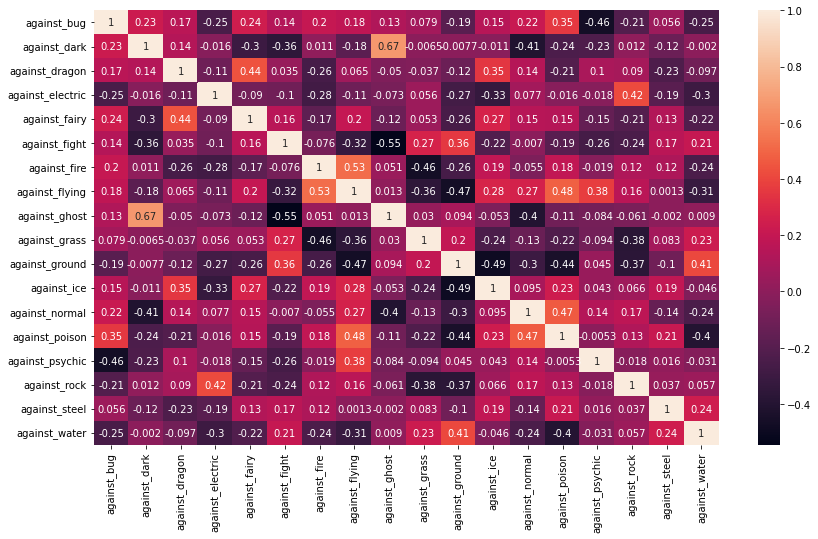

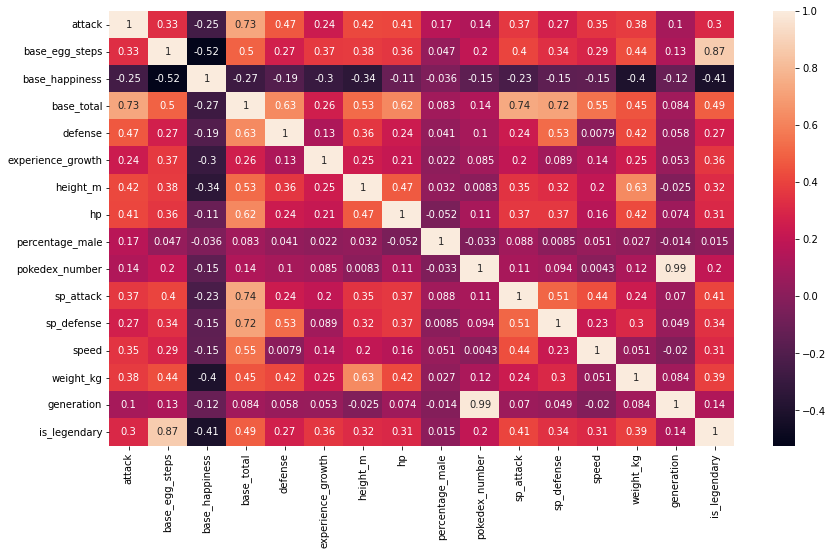

In [19]:
#Split the data into attack and general stat correlations
against = []
other = []

for i in data.columns:
  if 'against' in i:
    against.append(i)
  else:
    other.append(i)

plt.figure(figsize=(14, 8))
sns.heatmap(data[against].corr(), cbar=True, annot=True)
plt.show()

plt.figure(figsize=(14,8))
sns.heatmap(data[other].corr(), cbar=True, annot=True)

According to the correlation matricies, we can see:


*   base_total has high correlation with attack, sp_attack, defense, and sp_defense
*   is_legendary has a high correlation with base_egg_steps







**Checking for Multicollinearity**

In [20]:
#The abilities, classification, name, japanese_name, type1, and type2 columns are data that are not as necessary to whether or not a pokemon is legendary, so they can be removed.
data.drop(['abilities', 'classfication', 'name', 'japanese_name', 'type1', 'type2'], axis=1, inplace=True)

data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.7,45,88.1,1,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,60,88.1,2,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,2.0,80,88.1,3,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.6,39,88.1,4,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,1.1,58,88.1,5,80,65,80,19.0,1,0


In [21]:
vif = pd.DataFrame()
data['capture_rate'] = data['capture_rate'].apply(int)
X = data.drop('percentage_male', axis=1)
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,against_bug,14.333060
1,against_dark,27.763524
2,against_dragon,47.906895
3,against_electric,11.540764
4,against_fairy,18.456304
5,against_fight,13.762208
6,against_fire,15.261158
7,against_flying,24.612958
8,against_ghost,17.815070
9,against_grass,5.423541


The VIF values of attack, base_total, defense, hp, sp_attack, sp_defense, and speed are all infinity while base_egg_steps and base_happiness have very large values, suggesting multicollinearity.

**How does a pokemon's "base_egg_steps" affect whether or not it is a legendary?**

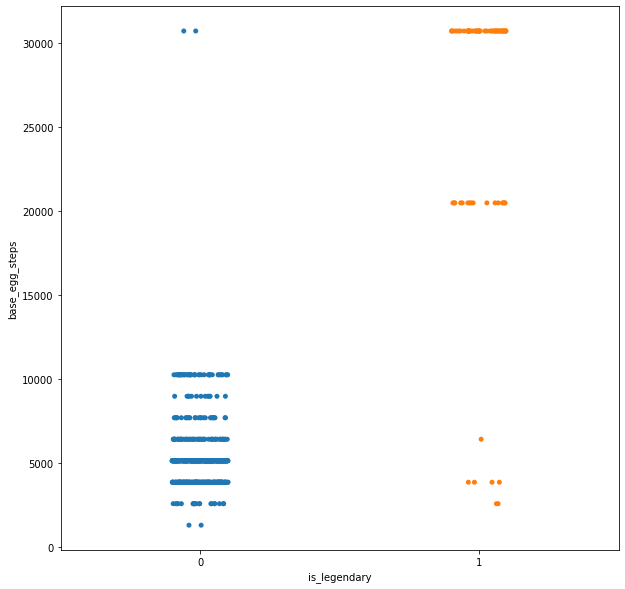

In [23]:
#Relationship between base_egg_steps and legendary
plt.figure(figsize=(10,10))
sns.stripplot(x='is_legendary', y='base_egg_steps', data=data)

From the strip plot we can see that as base_egg_steps decreases, legendaries decrease and as base_egg_steps increase, legendaries increase.

**What is the count of pokemon per generation?**

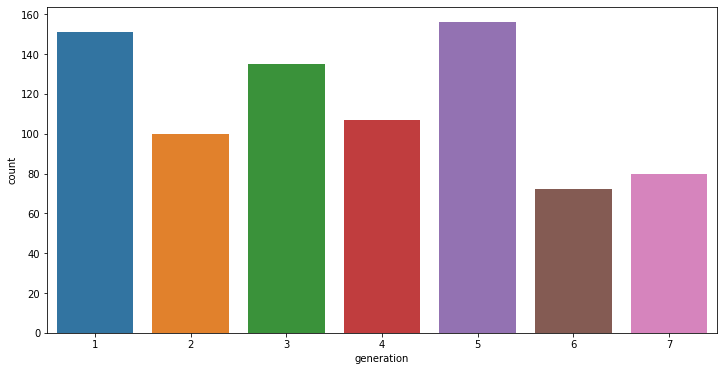

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='generation', data=data)

From this plot we can see:

*   Generation 5 has the most pokemon
*   Generation 6 has the least pokemon
*   Odd generations have more pokemon than even generations



#Predicting Legendary Pokemon:


In [25]:
#Pre-process the dataset
sc = StandardScaler()

X = data.drop('is_legendary', axis=1)
y = data['is_legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
#Create a logistic regression model to predict legendary pokemon
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print('Logistic Regression Classification report:\n' + classification_report(y_test, pred_logreg))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_logreg))
print('\nAccuracy: ' + str(accuracy_score(y_test, pred_logreg)*100) + '%')

Logistic Regression Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       292
           1       0.87      0.90      0.88        29

    accuracy                           0.98       321
   macro avg       0.93      0.94      0.93       321
weighted avg       0.98      0.98      0.98       321

Confusion matrix:
 [[288   4]
 [  3  26]]

Accuracy: 97.81931464174455%


In [27]:
#Create a deep learning neural network to predict legendary pokemon
mlpc = MLPClassifier(hidden_layer_sizes=(35, 35, 35), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

print('Deep Learning Classification report:\n' + classification_report(y_test, pred_mlpc))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_mlpc))
print('\nAccuracy: ' + str(accuracy_score(y_test, pred_mlpc)*100) + '%')

Deep Learning Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       292
           1       0.93      0.93      0.93        29

    accuracy                           0.99       321
   macro avg       0.96      0.96      0.96       321
weighted avg       0.99      0.99      0.99       321

Confusion matrix:
 [[290   2]
 [  2  27]]

Accuracy: 98.75389408099689%


As can be seen through the classification reports, the Logistic Regression model and the Deep Learning model have very similar results.